In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet import Prophet

# **CaseCount_KP.csv 불러오기 & 시각화**

In [35]:
kp = pd.read_csv('/content/drive/MyDrive/cau_file/research/national_security/CaseCount_KP.csv')

In [36]:
kp['datetime'] = pd.to_datetime(kp['datetime'])
kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     778 non-null    datetime64[ns]
 1   case_counts  778 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.3 KB


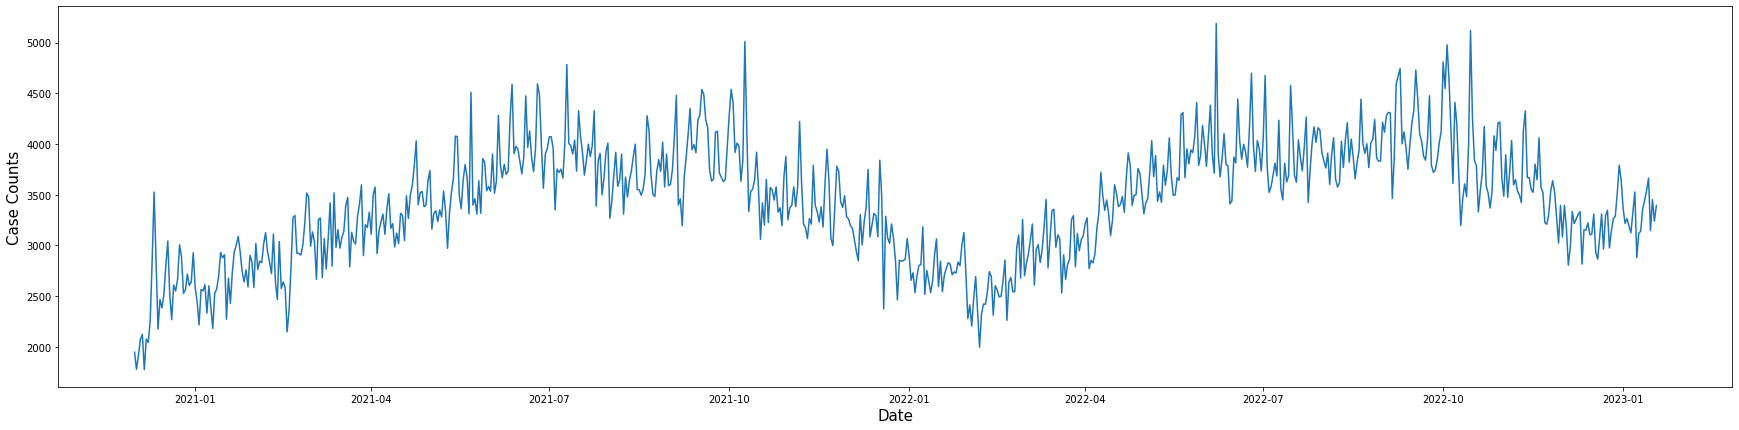

In [37]:
fig, ax = plt.subplots(figsize=(30, 7))

ax.plot(kp['datetime'], kp['case_counts'])
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Case Counts', fontsize=15)
plt.show();

In [38]:
# Prophet 모델 학습을 위해 컬럼명 변경
kp.rename(columns={'datetime' : 'ds', 'case_counts' : 'y'}, inplace=True)
kp

,ds,y
0,2020-12-01,1947
1,2020-12-02,1777
2,2020-12-03,1917
3,2020-12-04,2074
4,2020-12-05,2123
...,...,...
773,2023-01-14,3663
774,2023-01-15,3146
775,2023-01-16,3452
776,2023-01-17,3238


# **Prophet (구 FBProphet) Predict**

In [56]:
model = Prophet()
model.add_country_holidays(country_name='KR')
model.fit(kp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphae_8oje/30hij727.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphae_8oje/zux2ei_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41816', 'data', 'file=/tmp/tmphae_8oje/30hij727.json', 'init=/tmp/tmphae_8oje/zux2ei_6.json', 'output', 'file=/tmp/tmphae_8oje/prophet_model3h_vmbuc/prophet_model-20230215142825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [60]:
model.train_holiday_names

0                         Alternative public holiday
1                                     New Year's Day
2          The day preceding of Lunar New Year's Day
3                               Lunar New Year's Day
4             The second day of Lunar New Year's Day
5        Alternative holiday of Lunar New Year's Day
6                          Independence Movement Day
7                             Birthday of the Buddha
8                                     Children's Day
9                                         Labour Day
10                                      Memorial Day
11                                    Liberation Day
12                      The day preceding of Chuseok
13                                           Chuseok
14                         The second day of Chuseok
15                           National Foundation Day
16                                       Hangeul Day
17                                     Christmas Day
18             Alternative holiday of Liberati

In [57]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

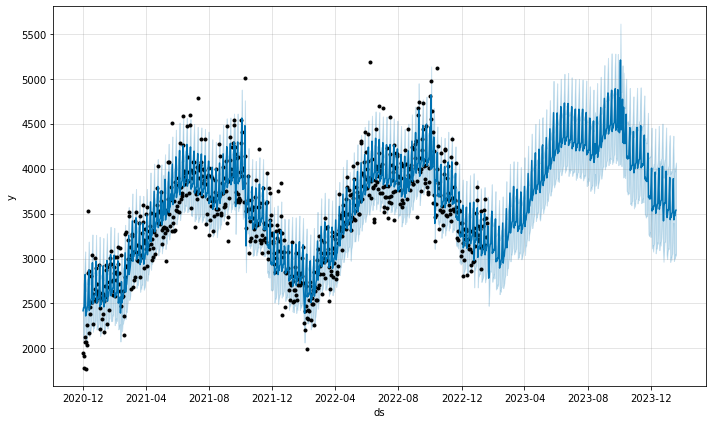

In [58]:
fig = model.plot(forecast)

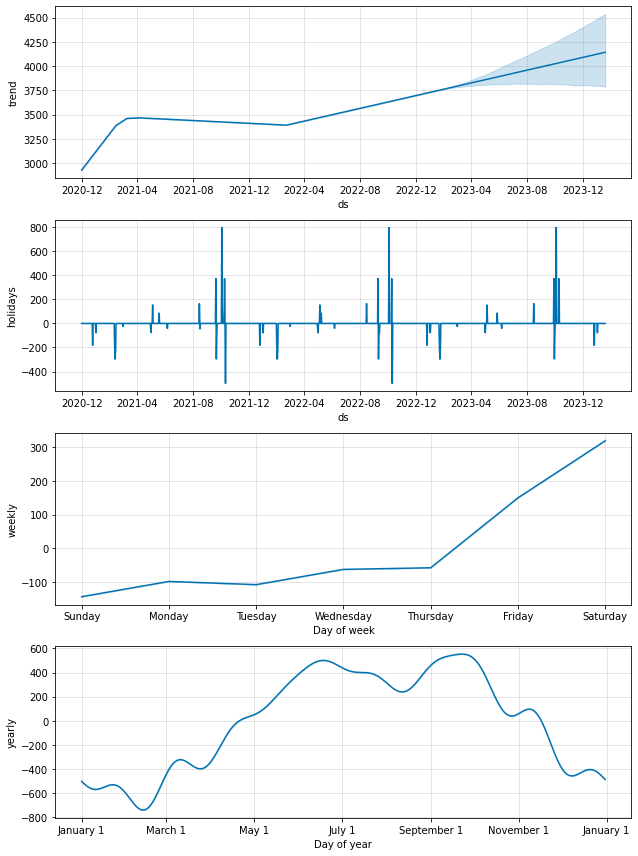

In [59]:
fig2 = model.plot_components(forecast)

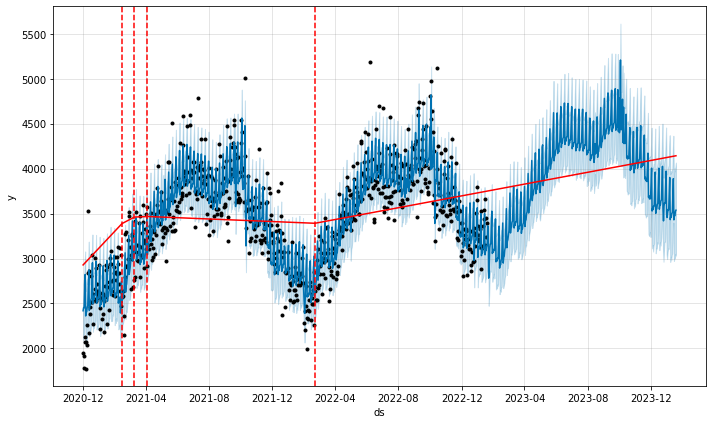

In [61]:
from prophet.plot import add_changepoints_to_plot # prophet은 changepoint에 민감함

fig3 = model.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), model, forecast)

In [62]:
forecast.tail(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Chuseok,Alternative holiday of Chuseok_lower,Alternative holiday of Chuseok_upper,Alternative holiday of Hangeul Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1093,2023-11-30,4090.030102,3239.264828,4133.721694,3802.874586,4402.164239,0.0,0.0,0.0,0.0,...,-57.587941,-57.587941,-57.587941,-367.115285,-367.115285,-367.115285,0.0,0.0,0.0,3665.326876
1094,2023-12-01,4091.109780,3414.694405,4286.859666,3803.053526,4404.474244,0.0,0.0,0.0,0.0,...,149.838422,149.838422,149.838422,-388.040586,-388.040586,-388.040586,0.0,0.0,0.0,3852.907615
1095,2023-12-02,4092.189457,3564.310910,4455.148756,3803.086075,4406.784249,0.0,0.0,0.0,0.0,...,319.094828,319.094828,319.094828,-406.310189,-406.310189,-406.310189,0.0,0.0,0.0,4004.974097
1096,2023-12-03,4093.269135,3114.183387,3975.510848,3802.873007,4409.195290,0.0,0.0,0.0,0.0,...,-143.375975,-143.375975,-143.375975,-421.797082,-421.797082,-421.797082,0.0,0.0,0.0,3528.096078
1097,2023-12-04,4094.348812,3149.334663,4018.494846,3802.659938,4412.147557,0.0,0.0,0.0,0.0,...,-98.042385,-98.042385,-98.042385,-434.440192,-434.440192,-434.440192,0.0,0.0,0.0,3561.866236
1098,2023-12-05,4095.428490,3077.121226,4006.533917,3802.894368,4415.053184,0.0,0.0,0.0,0.0,...,-107.600868,-107.600868,-107.600868,-444.244949,-444.244949,-444.244949,0.0,0.0,0.0,3543.582673
1099,2023-12-06,4096.508167,3146.412201,4050.121213,3803.228253,4417.914985,0.0,0.0,0.0,0.0,...,-62.326081,-62.326081,-62.326081,-451.282111,-451.282111,-451.282111,0.0,0.0,0.0,3582.899976
1100,2023-12-07,4097.587845,3170.605091,4052.972858,3803.562138,4420.107651,0.0,0.0,0.0,0.0,...,-57.587941,-57.587941,-57.587941,-455.684898,-455.684898,-455.684898,0.0,0.0,0.0,3584.315006
1101,2023-12-08,4098.667523,3378.460710,4242.440387,3803.896023,4423.697777,0.0,0.0,0.0,0.0,...,149.838422,149.838422,149.838422,-457.644514,-457.644514,-457.644514,0.0,0.0,0.0,3790.861430
1102,2023-12-09,4099.747200,3549.993899,4445.790887,3804.229907,4426.958027,0.0,0.0,0.0,0.0,...,319.094828,319.094828,319.094828,-457.404194,-457.404194,-457.404194,0.0,0.0,0.0,3961.437835
